### TO DO

* Create "Total Stops" field in final DF
* ~~ take year out of "unique stop ID"~~
    * Re-run analysis on post-2015

# Readme

The MCPD claim that they allocate officers (and make traffic stops) based on accidents in each area. This file examines the veracity of that claim

In [117]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [118]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from tqdm import tqdm

In [119]:
df = pd.read_csv(r"C:\Users\mikha\Dropbox\mikhael_misc\Projects\Policing Thesis\New Modified Dataset.csv")

# Cleaning Data

## Create "Unique" Var (but now it's loaded - no need to run)

In [120]:
# unique = []
# for i in list(range(1,len(df))):
#     if df['Stop ID'].iloc[i-1] != df['Stop ID'].iloc[i]:
#         unique.append(1)
#     else:
#         unique.append(0)
     
# unique = [1] + unique

# del df['First Unique']

# df.insert(1, 'First Unique', unique)


# df.to_csv(r"C:\Users\mikha\Dropbox\mikhael_misc\Projects\Policing Thesis\New Modified Dataset.csv", index=False)

## Define Race set

In [121]:
race_set = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'}
race_set_w_total = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'TOTAL', 'WHITE'}

## Injuries without Accidents

Some observations have injuries but no accidents. I remove those

### First, confirm that they're randomly distributed

In [122]:
# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [123]:
# gdf[(gdf['Accident']==0) & (gdf['Personal Injury']==1) & (gdf['Latitude']!=0) & (gdf['Longitude']<=-75)].plot(figsize=(15,15), markersize=.4)

### Now remove them

In [124]:
df = df[~((df['Accident']==0) & (df['Personal Injury']==1))]

# Data Wrangling

*coordinates_dict[ longitude_i ][ latitude_j ][ FIELD** ][ race ] = information for that area*

** "field" equals things like "Number of Charges @ 9 MPH", "Average Speed NOT in 9,14 MPH", etc

## Set up *coordinates_dict*

In [136]:
CELL_WIDTH = 0.005
DECIMAL_PLACES = 3

MIN_LONGITUDE = -77.6
MAX_LONGITUDE = -76.8

MIN_LATITUDE = 38.92
MAX_LATITUDE = 39.5

def rounder(x):#rounds to nearest CELL_WIDTH; X decimal places
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

TOTAL_CELLS = round((((MIN_LONGITUDE-CELL_WIDTH)-(MAX_LONGITUDE+CELL_WIDTH))/CELL_WIDTH)*(((MIN_LATITUDE-CELL_WIDTH)-(MAX_LATITUDE+CELL_WIDTH))/CELL_WIDTH))
print('total # cells ~ ', TOTAL_CELLS)

coordinates_dict = {}
for x in np.arange(MIN_LONGITUDE-CELL_WIDTH, MAX_LONGITUDE+CELL_WIDTH, CELL_WIDTH):
    coordinates_dict[rounder(np.around(x,DECIMAL_PLACES))] = {}

for x in coordinates_dict:
    for y in np.arange(MIN_LATITUDE-CELL_WIDTH, MAX_LATITUDE+CELL_WIDTH, CELL_WIDTH):
        coordinates_dict[x][rounder(np.around(y,DECIMAL_PLACES))] = {
#                                                 "All Speeds Over Limit": {race: [] for race in race_set_w_total},
#                                                "Number of Speeding Charges":{race: 0 for race in race_set_w_total},
#                                                "Average Speed NOT in 9,14 MPH": {race: 0 for race in race_set_w_total},
                                               
#                                                  "Number of Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Number of Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 
                                                
#                                                  "Percent of Own Race's Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Percent of Own Race's Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 

#                                                 "Percent of Charges that were CHANGED": {race: 0 for race in race_set_w_total}, 
#                                                 "Percent of Charges that were NOT CHANGED": {race: 0 for race in race_set_w_total}, 
                                                                    
# #                                                  "As Percent of All Races' Charges @ 9 MPH" : {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races' in 9,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                  "As Percent of All Races in 10,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races in 9,14 MPH": {race: 0 for race in race_set_w_total},                                                                      
                                                
#                                                 "Number of Citations for Each Stop": {race: [] for race in race_set_w_total},
#                                                 "Racial Composition": {race: 0 for race in race_set_w_total},
                                                "Total Observations": 0,
                                                "Total Citations": 0,
                                                "Total Accidents": 0,
                                                "Total Injuries": 0,
                                                "Total Fatalities": 0,
                                                "Total Stops": 0,
                                                "Total ASIAN Stops": 0,
                                                "Total BLACK Stops": 0,            
                                                "Total HISPANIC Stops": 0,                                                                    
                                                "Total OTHER Stops": 0,
                                                "Total WHITE Stops": 0,        
        
        }

        
        


total # cells ~  19116


### Def Rounding Function

In [127]:
def rounder(x):
    """
    Rounds to nearest CELL_WIDTH; decimal places
    """
    
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

## Fill *coordinates_dict*

In [137]:
# zipped_vars=list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Number of Citations']))

for i,x in enumerate(list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Citation - (D_Violation Type)'], df['Accident'], df['Personal Injury'], df['Fatal'], df['First Unique']))):
        if MIN_LONGITUDE <= x[0] <= MAX_LONGITUDE: #-77.6 <= x <= -76.8
            if MIN_LATITUDE <= x[1] <= MAX_LATITUDE:

#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ x[2] ] += 1
#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ 'TOTAL' ] += 1
                
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Observations" ] += 1
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Citations" ] += x[4] 
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Accidents" ] += x[5] # ==1 if accident
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Injuries" ] += x[6]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Fatalities" ] += x[7]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Stops" ] += x[8]
                if x[2] == 'ASIAN':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total ASIAN Stops" ] += x[8]
                elif x[2] == 'BLACK':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total BLACK Stops" ] += x[8]
                if x[2] == 'HISPANIC':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total HISPANIC Stops" ] += x[8]
                if x[2] == 'OTHER':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total OTHER Stops" ] += x[8]
                if x[2] == 'WHITE':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total WHITE Stops" ] += x[8]
                

                
#                 if not np.isnan(x[3]): # if df["Speed Over Posted Limit"].iloc[i] != np.nan
                    
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] += 1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ][ x[2] ].append(x[3])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ]['TOTAL'].append(x[3])

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] +=1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ x[2] ].append(x[4])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ 'TOTAL' ].append(x[4])


#                     if x[3] == 9:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ 'TOTAL' ] += 1

#                     if 9 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ 'TOTAL' ] += 1

#                     if 10 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ 'TOTAL' ] += 1
                        
#                     if 9 > x[3] or x[3] > 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ 'TOTAL' ] += 1

## Create pd dataframe from coordinates_dict

In [138]:
#convert dict to pd df
allocation_balance_df = pd.DataFrame.from_dict({(i,j): coordinates_dict[i][j] 
                           for i in coordinates_dict.keys() 
                           for j in coordinates_dict[i].keys()},
                       orient='index')

#give names to multi-index
allocation_balance_df.index.names = ['long', 'lat']

#convert indices to cols
allocation_balance_df.reset_index(level=allocation_balance_df.index.names, inplace=True)

In [139]:
#convert to geopandas dataframe
gdf = gpd.GeoDataFrame(
    allocation_balance_df, geometry=gpd.points_from_xy(allocation_balance_df['long'], allocation_balance_df['lat']))

In [141]:
# create fields
gdf['Observations per Accident'] = gdf['Total Observations'] / gdf['Total Accidents']
gdf['Accidents per Observation'] = gdf['Total Accidents'] / gdf['Total Observations']

gdf['Observations per Injury'] = gdf['Total Observations'] / gdf['Total Injuries']
gdf['Injuries per Observation'] = gdf['Total Injuries'] / gdf['Total Observations']

gdf['Observations per Fatality'] = gdf['Total Observations'] / gdf['Total Fatalities']
gdf['Fatalities per Observation'] = gdf['Total Fatalities'] / gdf['Total Observations']

gdf['Stops per Accident'] = gdf['Total Stops'] / gdf['Total Accidents']
gdf['Accidents per Stop'] = gdf['Total Accidents'] / gdf['Total Stops']

gdf['Stops per Injury'] = gdf['Total Stops'] / gdf['Total Injuries']
gdf['Injuries per Stop'] = gdf['Total Injuries'] / gdf['Total Stops']

gdf['Citations per Stop'] = gdf['Total Citations'] / gdf['Total Stops']

gdf['% Stops ASIAN'] = gdf['Total ASIAN Stops'] / gdf['Total Stops']
gdf['% Stops BLACK'] = gdf['Total BLACK Stops'] / gdf['Total Stops']
gdf['% Stops HISPANIC'] = gdf['Total HISPANIC Stops'] / gdf['Total Stops']
gdf['% Stops OTHER'] = gdf['Total OTHER Stops'] / gdf['Total Stops']
gdf['% Stops WHITE'] = gdf['Total WHITE Stops'] / gdf['Total Stops']


#replace inf with 0
gdf.replace(np.inf, 0, inplace=True)

#drop cells with less than 30 Observations
gdf = gdf[gdf['Total Observations']>=30]

# replace nan with zero
gdf.fillna(0, inplace=True)

# normalize fields
for field in list(set(gdf.columns) - set(['long', 'lat', 'geometry'])): #all cols excep long, lat, geometry
    gdf['Normalized ' + field] = (gdf[field]-gdf[field].mean())/gdf[field].std()
    
# replace nan with zero again after normalizing
gdf.fillna(0, inplace=True)

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Export to CSV

In [44]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

In [34]:
gdf.to_csv(f"Police Stops vs Accidents - width={str(CELL_WIDTH)} - {today}.csv", index=False)

# Analysis

## Total Stops vs. Stops per Accident

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

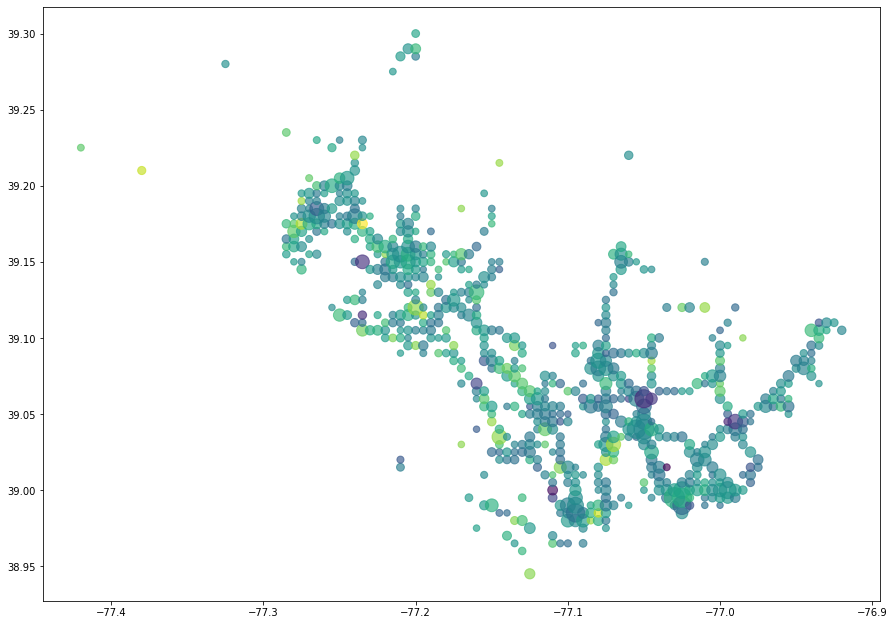

In [93]:
filter_gdf = gdf[(gdf['Total Stops']>300)]
# filter_gdf = gdf[(gdf['Stops per Accident']<150) & (gdf['Total Stops']>300)]

filter_gdf.plot(markersize=np.power(filter_gdf['Total Stops'], 0.65), figsize=(15,15), c=np.log(filter_gdf['Stops per Accident']), alpha=.65, legend=True)

In [94]:
gdf['Total Stops'].corr(gdf['Total Accidents'])

0.4769933604849849

In [142]:
df1 = pd.DataFrame(gdf)

<AxesSubplot:xlabel='Total Stops', ylabel='Total Accidents'>

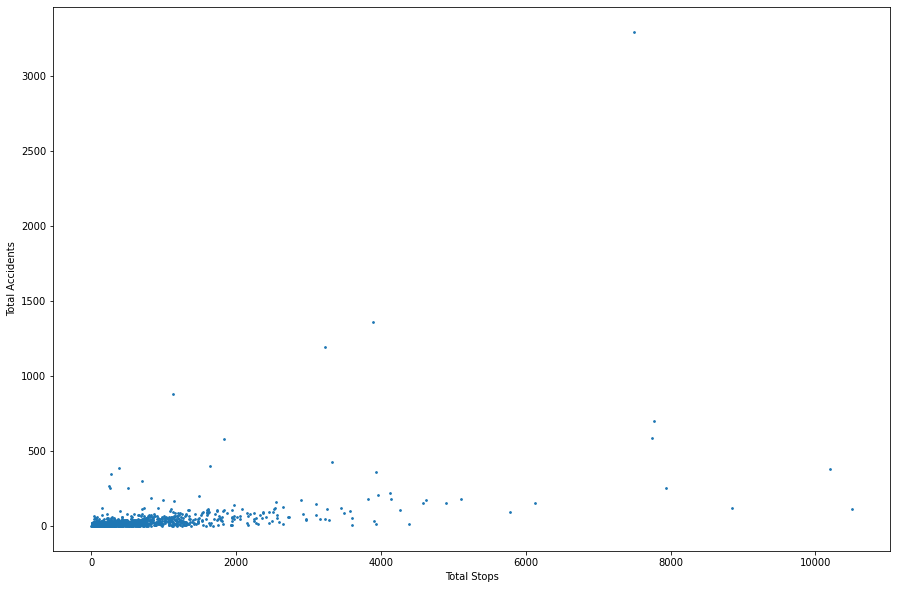

In [132]:
df1.plot(kind='scatter', x="Total Stops", y="Total Accidents", s=3, figsize=(15,10))

## Let's zoom in so we can see if there's a pattern on the bottom-left of this ^^

Text(0.5, 1.0, 'Total Accidents vs. Stops')

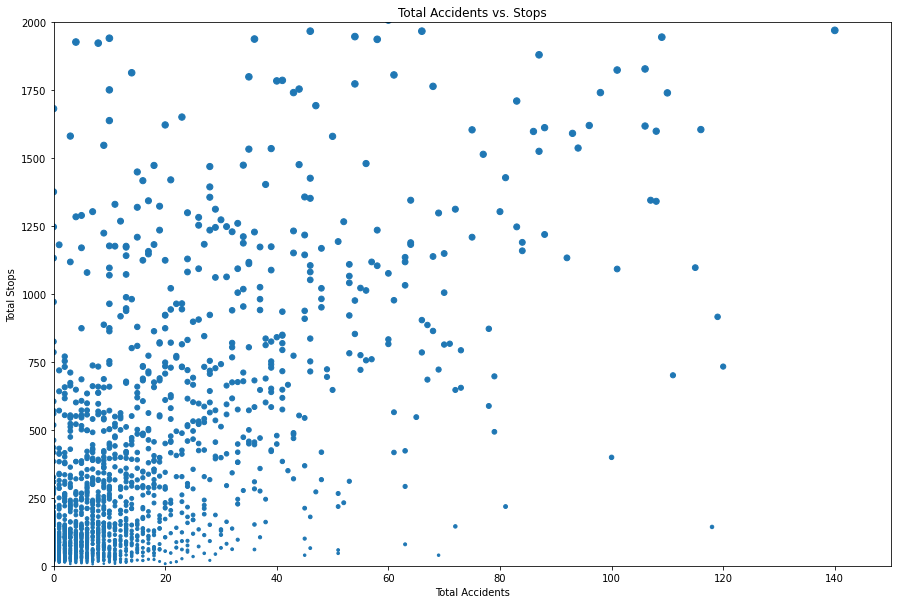

In [164]:
fig, ax1 = plt.subplots()

df1.plot(kind='scatter', y="Total Stops", x="Total Accidents", s=np.power(df1['Total Stops'], .5), figsize=(15,10), ylim=(0,2000), xlim=(0,150), ax=ax1, legend=True)

plt.title("Total Accidents vs. Stops")

### Weighted corr (probably wrong)

In [233]:
# np.cov(df1['Total Accidents'], df1['Total Stops'], fweights=df1['Total Stops'])

# weighted_VAR_total_accidents = np.cov(df1['Total Accidents'], df1['Total Stops'], fweights=df1['Total Stops'])[0,0]
# weighted_VAR_total_stops = np.cov(df1['Total Accidents'], df1['Total Stops'], fweights=df1['Total Stops'])[1,1]
# weighted_COV_total_accidents_stops = np.cov(df1['Total Accidents'], df1['Total Stops'], fweights=df1['Total Stops'])[0,1]

# weighted_CORR_total_accidents_stops = weighted_COV_total_accidents_stops / (weighted_VAR_total_accidents * weighted_VAR_total_stops)
# corr_str = format(weighted_CORR_total_accidents_stops, 'f')
# print(f'Weighted correlation between Total Accidents and Total Stops is approx {corr_str}. MAYBE - DUBIOUS')

## Truncated Plot

In [195]:
lower_bound = 600

pct_of_stops_above_lower_bound = 100 * ( df1[df1['Total Stops'] > lower_bound]['Total Stops'].sum() / df1['Total Stops'].sum())

print(f'{round(pct_of_stops_above_lower_bound, 2)}% of stops are in tiles with over {lower_bound} stops')

Text(0.5, 1.0, 'Total Accidents vs. Stops')

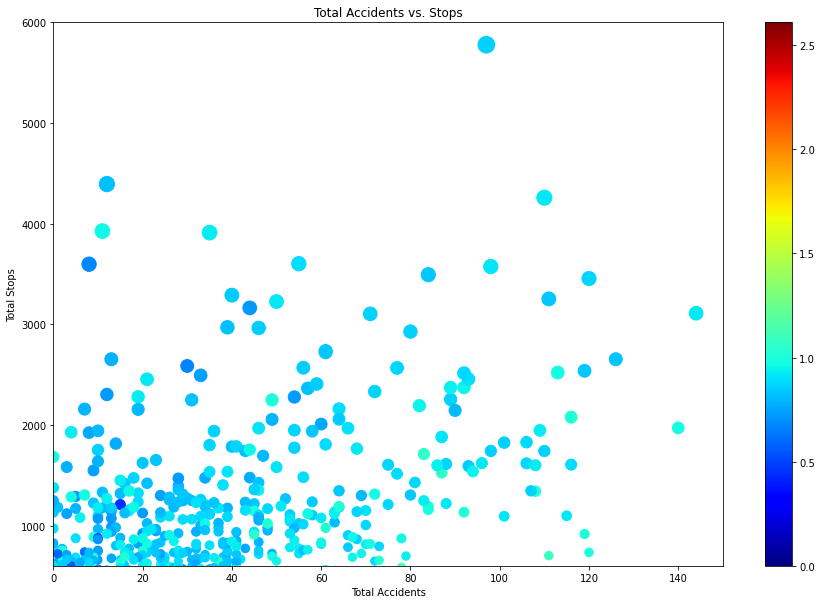

In [223]:


fig, ax1 = plt.subplots()

df1.plot(kind='scatter', y="Total Stops", x="Total Accidents", s=np.power(df1['Total Stops'], .65), figsize=(15,10), ylim=(lower_bound,6000), xlim=(0,150), ax=ax1, legend=True, c=np.power(df1['Citations per Stop'], .35), cmap='jet')

plt.title("Total Accidents vs. Stops")

In [234]:
np.corrcoef(df1[df1['Total Stops']>lower_bound]['Total Stops'], df1[df1['Total Stops']>lower_bound]['Total Accidents'])

array([[1.        , 0.42919404],
       [0.42919404, 1.        ]])

## Regression Analysis

In [228]:
df1['Total_Accidents'] = df1['Total Accidents']
df1['Total_Stops'] = df1['Total Stops']

In [232]:
mod = smf.wls(formula='Total_Stops ~ Total_Accidents', data=df1, weights=df1['Total Stops'])
res = mod.fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.185
Model:                            WLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     457.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.14e-91
Time:                        01:59:59   Log-Likelihood:                -19243.
No. Observations:                2014   AIC:                         3.849e+04
Df Residuals:                    2012   BIC:                         3.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1665.5838     47.918     

# Conclusion - Accidents explain 18.5% of the variation in MCPD Stops

Note: this is probably an overestimate, since we likely suffer from OVB of popularity of roads - the more popular a road is, the more likely police *and* civilians are to drive on it - therefore, civilians are more likely to get into accidents, and police are more likely to see civilians and pull them over. 18.5% is honestly lower than I would expect if MCPD assigned officers irrespective of accidents.

## Is race a better predictor than accidents?

In [243]:
for race in race_set-{'NATIVE AMERICAN'}:
    df1[f'pct_Stops_{race}'] = df1[f'% Stops {race}']

In [250]:
race_str = ''.join([f'pct_Stops_{race} + ' for race in race_set-{'NATIVE AMERICAN', 'OTHER'}])[:-3]
race_str

'pct_Stops_ASIAN + pct_Stops_BLACK + pct_Stops_HISPANIC + pct_Stops_WHITE'

In [254]:
race_mod = smf.wls(formula=f'Total_Stops ~ Total_Accidents + {race_str}', data=df1, weights=df1['Total Stops'])
race_res = race_mod.fit()
print(race_res.summary())

                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.252
Model:                            WLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          6.30e-124
Time:                        02:12:06   Log-Likelihood:                -19157.
No. Observations:                2014   AIC:                         3.833e+04
Df Residuals:                    2008   BIC:                         3.836e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1283.5894   1726

## Race is a better predictor of MCPD stops than accidents

Race explains 25% of the variation in MCPD stops.

# Race vs. citations per stop

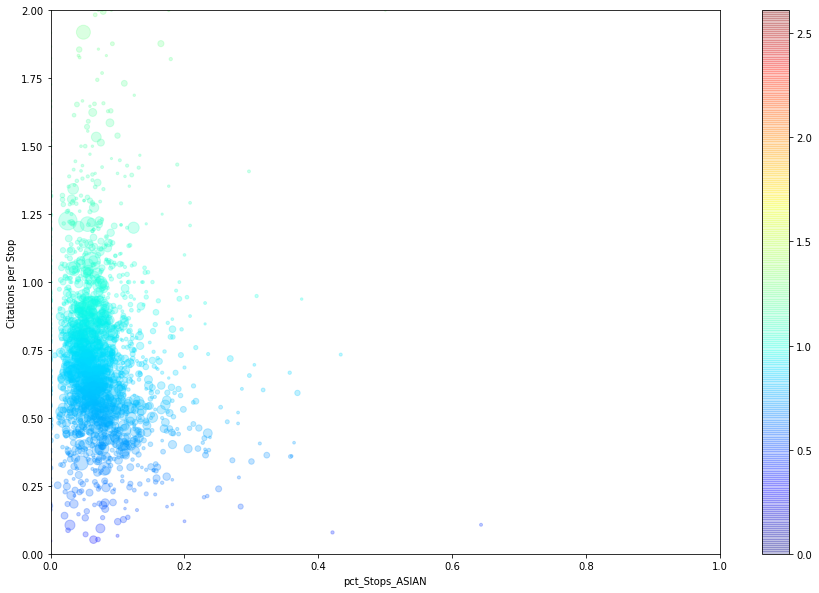

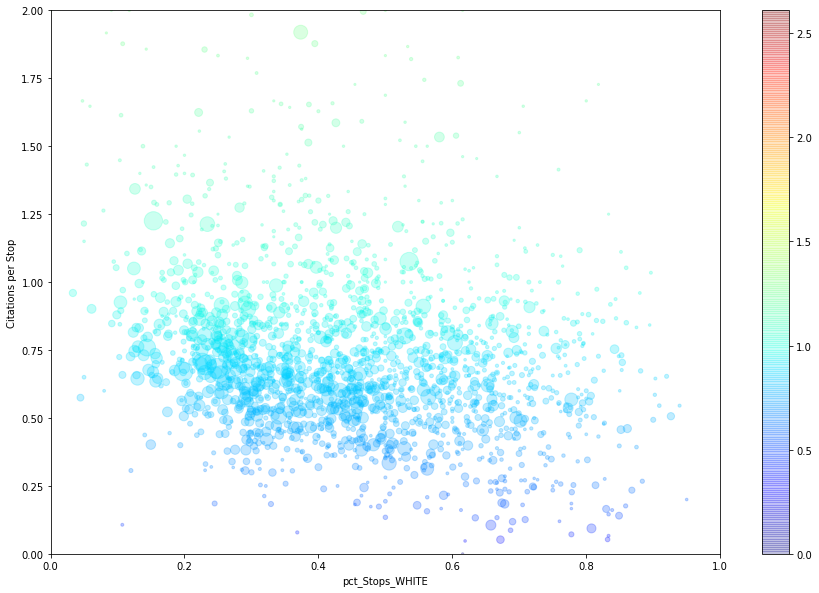

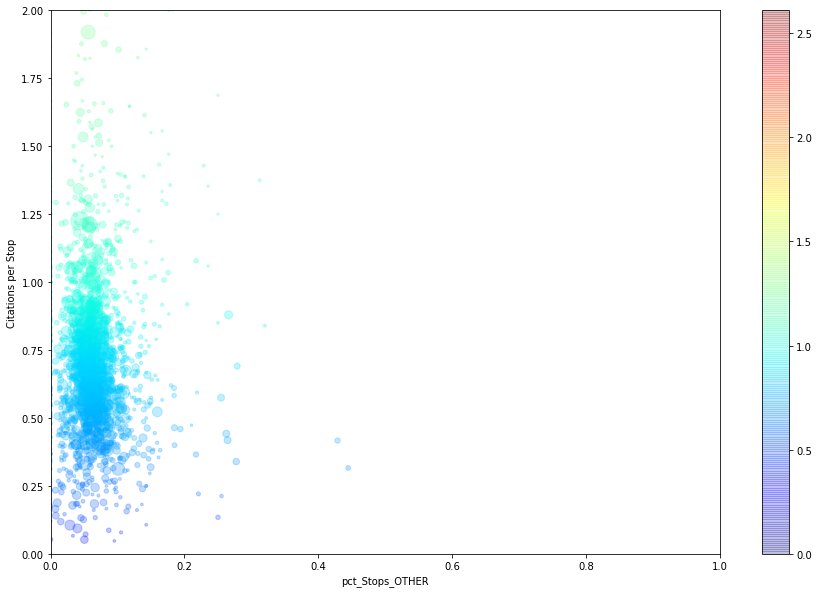

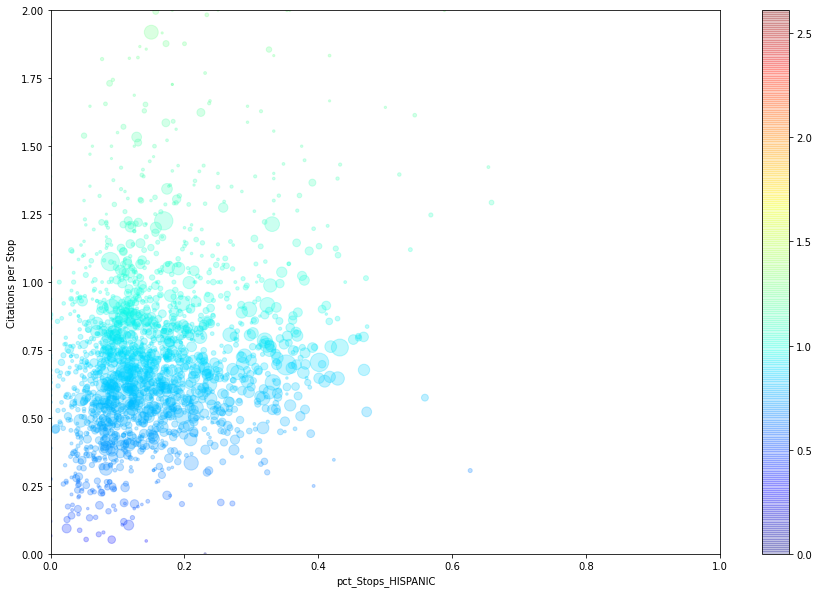

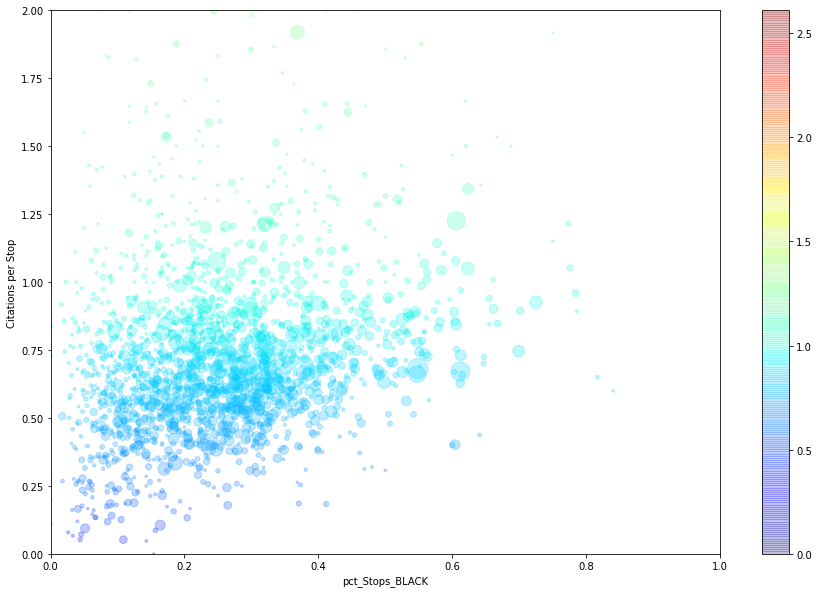

In [260]:

for race in race_set-{'NATIVE AMERICAN'}:
    fig, ax1 = plt.subplots()
    df1.plot(kind='scatter', y="Citations per Stop", x=f"pct_Stops_{race}", s=np.power(df1['Total Stops'], .65), figsize=(15,10), ylim=(0,2), xlim=(0,1), ax=ax1, legend=True, c=np.power(df1['Citations per Stop'], .35), cmap='jet', alpha=.25)
    plt.show()

<AxesSubplot:xlabel='Accidents per Stop', ylabel='Total Stops'>

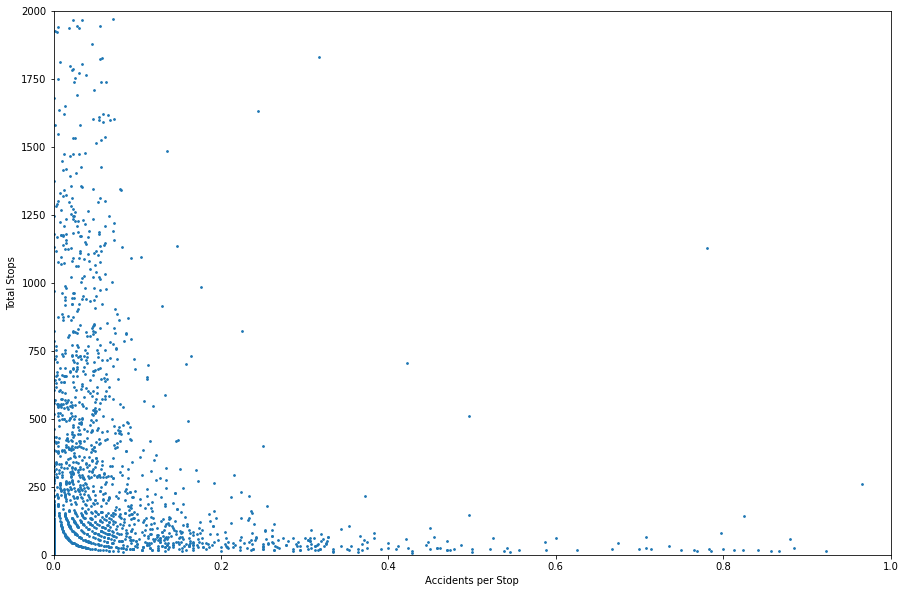

In [147]:
df1.plot(kind='scatter', y="Total Stops", x="Accidents per Stop", s=3, figsize=(15,10), ylim=(0,2000), xlim=(0,1))

<AxesSubplot:xlabel='Total Accidents', ylabel='Accidents per Stop'>

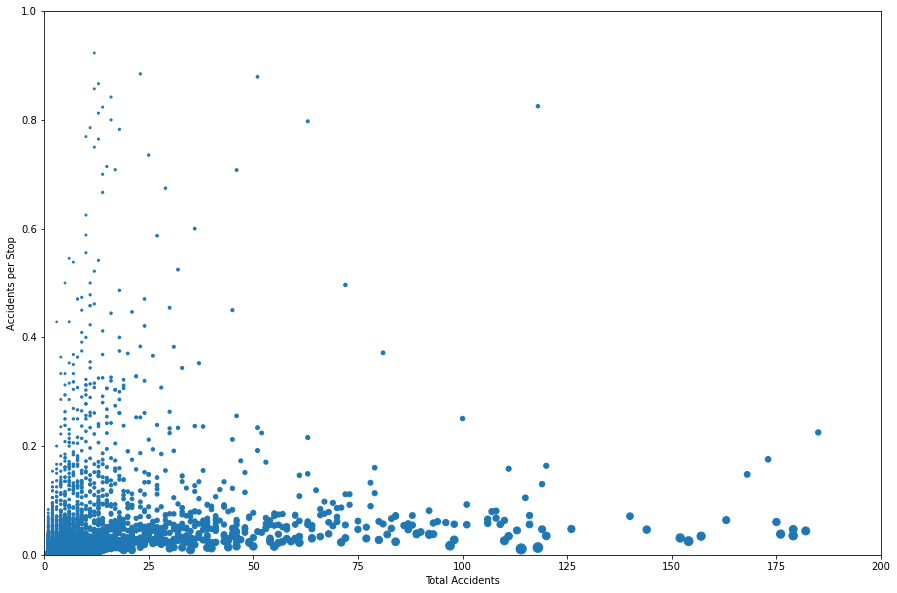

In [157]:
df1.plot(kind='scatter', x="Total Accidents", y="Accidents per Stop", figsize=(15,10), ylim=(0,1), xlim=(0,200), s=np.power(df1['Total Stops'], .5))